In [200]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [201]:
#Computing the cost funcion
def computeCost(theta,X,y):
    m=len(y) #len of an array returns the number of columns of the array
    cost=(1/(2*m))*np.sum(np.power(((X.dot(theta))-y),2)) 
    #.dot is to make sure matrix multiplication of array occurs. * is for element-wise
    #.sum returns the summation of all elements of the array
    return(cost)

In [202]:
def gradientDescent(theta,X,y,alpha): #Vectorized approach for gradient descent
    m=len(y)
    Xt=X.transpose() #.transpose is to transpose the matrix
    theta_new=theta-((alpha/m)*(Xt.dot((X.dot(theta))-y)))
    return(theta_new)

,Population,Profits
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


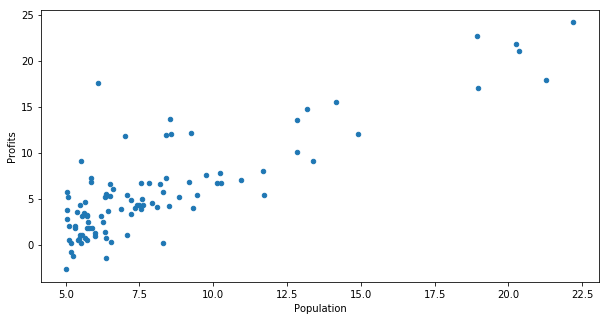

In [203]:
raw_data=pd.read_csv('LinRegData1-Coursera.txt') #once you use pandas you use the stored datavariable.pandasfunction for all manipulation(DataFrame)
raw_data.plot(kind='scatter',x='Population',y='Profits',figsize=(10,5)) #x and y have to be included : the data labels as in the txt or csv file
raw_data.head() #prints first five rows of your data

In [204]:
#Mean Normalization and inserting ones

data=(raw_data-raw_data.mean())/(raw_data.max()-raw_data.min())
#.mean,.max and .min find the mean max and min for every column in your Dataframe so you are simultaneously processing it
data.insert(0,'Ones',1) #DataFrameName.insert(location, column name, value, allow_duplicates = False)
data.head() #always print it at the end, else it won't come

,Ones,Population,Profits
0,1,-0.119334,0.438087
1,1,-0.153242,0.122674
2,1,0.020889,0.291597
3,1,-0.067338,0.224204
4,1,-0.133907,0.036685


In [205]:
#Separating X and Y data

cols=data.shape[1] #.shape is a tuple hence you call with []. 0 for row size and 1 for column size
X=data.iloc[:,0:cols-1] #iloc can be used to access the data in various ways
y=data.iloc[:,cols-1:cols]
X=np.array(X)
y=np.array(y) 

In [206]:
#Initializations

iters=200 #number of iterations
alpha=0.5 #Learning rate
costs=np.zeros(iters+1)
theta=np.array([[0],[0]])#a numpy array can be used as a matrix only when it is like an array in an array [[0]], and not just [0]

#Learning
costs[0]=computeCost(theta,X,y)
for i in range(iters):
    theta=gradientDescent(theta,X,y,alpha)
    costs[i+1]=computeCost(theta,X,y)
print(theta)

[[  1.71683973e-16]
 [  7.59112478e-01]]


Text(0.5,1,'Cost function vs iterations')

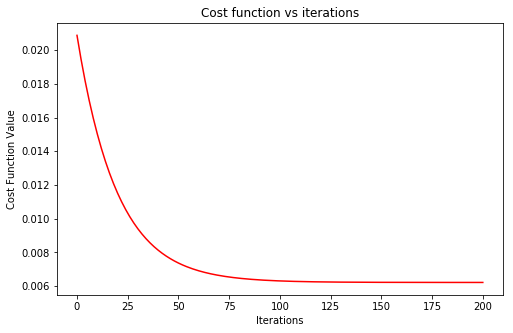

In [207]:
#Plotting cost function versus number of iterations

fig,ax=plt.subplots(figsize=(8,5))
ax.plot(np.arange(iters+1),costs,'r',label='Cost Function') #.arange returns evenly spaced values in a given interval
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost Function Value')
ax.set_title('Cost function vs iterations')

Text(0.5,1,'Predicted Profits vs Population')

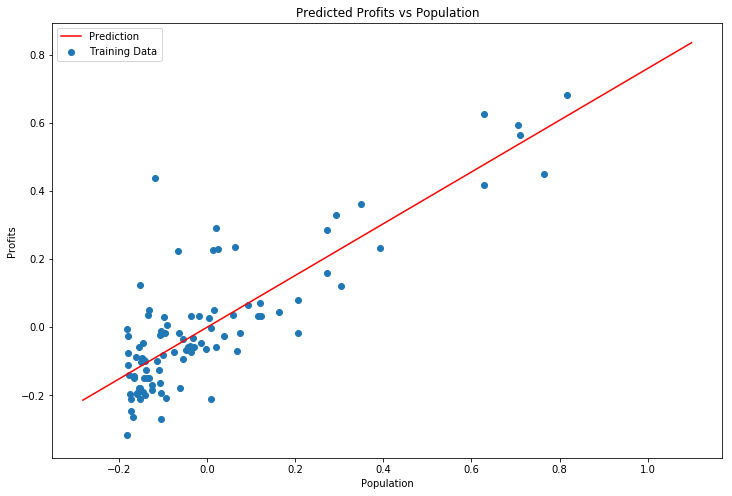

In [208]:
#Plotting Predicted Value vs Original Value

a=np.array([[1,X.min()-0.1],[1,X.max()+0.1]])
b=a.dot(theta)
fig,ax=plt.subplots(figsize=(12,8))
ax.plot(a[:,1],b,'r',label='Prediction')
ax.scatter(data.Population,data.Profits,label='Training Data')
ax.legend(loc=2) #Location of legends
ax.set_xlabel('Population')
ax.set_ylabel('Profits')
ax.set_title('Predicted Profits vs Population')

In [209]:
#Checking error and accuracy

er0=((np.sqrt(costs[-1]*2*len(y)))/len(y))*100 #Error formula
print('error % = {}'.format(er0))
print('accuracy % = {}'.format(100-er0))

error % = 1.1325498341338935
accuracy % = 98.8674501658661


In [210]:
#Predicting new profits

new_pop=float(input("Enter the population of the region in 10,000s\n")) #new population in 10,000s
mean=raw_data.mean()
maxi=raw_data.max()
mini=raw_data.min()
corrected_pop=(17-mean[0])/(maxi[0]-mini[0]) #Converting input to mean normalized input
new_profit=(np.array([[1,corrected_pop]])).dot(theta)
corrected_profit=(new_profit*(maxi[1]+mini[1]))+mean[1] #Converting mean normalized output to actual output
print('For a population of ',new_pop*10000,', the profit gained will be ',float(corrected_profit)*10000,)

Enter the population of the region in 10,000s
20
For a population of  200000.0 , the profit gained will be  142260.23287846686
